### Summary of Analysis

**More understanding from Data:**  
1. 'INVOICE LINE TEXT' column represents the charges billed to end user(bike owner)
2. This column contains charges for spare parts as well as charges for services like labour, cleaning, overhual.  
3. We are interested in rate of demand for parts/items/consumables only.  
4. Only parts/items/consumbables need to be procured from manufacturer.  
5. So, we need to remove/clean all rows that are charges for services. 

### 'INVOICE LINE TEXT' column is analyzed and following conclusions are made


* 'ONE WAY CLUTCH BUSH KIT' should be used in place of 'SERVICE AND ONE WAY CLUTCH BUSH KIT''
* 'MAGNET COIL AND PICKUP COIL' split this row into 2 rows
* Delete all rows with 'STICKER' except 'NUMBER PLATE WITH STICKERS', replace that with removing sticker
* Delete all rows with 'LABOUR' except 'VISIOR WITH LABOUR', replace that with 'VISIOR'
* Delete all rows with 'overhual' as it is not a item from manufacturer
* Delete all lines with 'CHARGE'
* Delete all lines with 'INSURANCE', 'PAYMENT', 'REGISTER*', 'ADJUSTMENT', 'WELDING', 'REMOVAL', 'THREADING', 'CLEANING', 
* Delete all lines with 'FEES', 'REBORE', 'PUNCHER', 'EX SHOW ROOM', 'DENT', 'RC CARD', 'TAX', 'ENGINE WORK', 'PETROL',
* Delete all lines with 'SERVICE', 'CHECK*'

## Below are some of the findings, assumptions and conclusions

* There are more than 25k orders in 21 months of data

* Top 20 items make up nearly 19.8k orders

* That means, top 20 items make up 80% of the demand

* From data, there are a lot of items ordered less than 5 times over a period of 21 months. For these orders, order frequency is not sufficient for good forecasting  
* Our forecasting model should atleast forecast 80% of the orders so that it is significantly useful to customer.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('P4dataCleaned.xlsx', index_col='Unnamed: 0')

In [3]:
df.head(2)

,Invoice Date,Job Card Date,Vehicle Model,Current KM Reading,INVOICE LINE TEXT
0,2017-05-30,2017-05-30,BAJAJ AVENGER STREET 220,50000,ENGINE OIL
1,2017-06-02,2017-05-31,BAJAJ PULSAR NS 200,758,ENGINE OIL


In [4]:
df.shape

(28448, 5)

In [5]:
df['Vehicle Model'] = df['Vehicle Model'].astype('category')

In [6]:
df['INVOICE LINE TEXT'] = df['INVOICE LINE TEXT'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28448 entries, 0 to 28481
Data columns (total 5 columns):
Invoice Date          28448 non-null datetime64[ns]
Job Card Date         28448 non-null datetime64[ns]
Vehicle Model         28448 non-null category
Current KM Reading    28448 non-null int64
INVOICE LINE TEXT     28448 non-null category
dtypes: category(2), datetime64[ns](2), int64(1)
memory usage: 997.7 KB


In [8]:
df.groupby(['Invoice Date', 'INVOICE LINE TEXT']).size()

Invoice Date  INVOICE LINE TEXT  
2017-05-30    ENGINE OIL             1
2017-05-31    3M OIL                 2
              CHAIN LUBRICATION      2
              ENGINE OIL             4
              GENERAL SERVICE        1
              OIL FILTER             1
2017-06-01    3M OIL                 5
              AIR FILTER CHECKUP     3
              BRAKE SHOE             1
              CARBURETOR CLEANING    1
              CHAIN LUBRICATION      5
              CRASH GUARD            1
              Clutch cable           1
              DISC LEVER             1
              DRUM BOLT WASHER       1
              ENGINE OIL             7
              FORK BEND              2
              FORK CONE SET          1
              FORK OIL               1
              FORK OIL SEAL          1
              GENERAL SERVICE        2
              HANDLEBAR              1
              HEAD LIGHT DOOM        1
              SIDE SHIELD            1
              TANK ASSEMBLY   

In [9]:
df['INVOICE LINE TEXT'].value_counts()

ENGINE OIL                     3802
CHAIN LUBRICATION              3441
GENERAL SERVICE                2142
AIR FILTER                     1715
3M OIL                         1628
CONSUMABLES                    1595
POLISH                         1245
DISC OIL                        991
BRAKE SHOE                      965
OIL FILTER                      821
DISC PAD                        575
WHEEL RUBBER                    521
AIR FILTER CHECKUP              467
SPARK PLUG                      421
CHAIN SPROCKET                  396
SPROCKET RUBBER                 347
SPROCKET BEARING                314
CHAIN OVERHAUL                  284
CLUTCH CABLE                    263
CLUTCH ASSEMBLY                 212
CLUTCH COVER GASKET             190
CLUTCH OVERHUAL                 163
TANK COVER                      134
LABOUR                          131
SEAT COVER                      119
INDICATOR                       110
DISC PUMP KIT                   104
DRUM BOLT                   

### Looking at the above data, following conclusions are drawn
1. 'INVOICE LINE TEXT' column represents the charges billed to end user(bike owner)
2. This column contains charges for spare parts as well as charges for service(like labour, cleaning, overhual)
3. We are interested in rate of demand for parts/items/consumables only.

### Removing those rows that are not parts/items/consumables 
* Only parts/items/consumbables need to procured from manufacturer, so requirement forecasting has to be done only for these parts

In [10]:
inventory = df['INVOICE LINE TEXT'].value_counts()
i = 0
for item, count in inventory.iteritems():
    if item.upper().find('OVERHUAL') != -1:
        i += 1
        print(i, item, count)
    if item.upper().find('OVERHAUL') != -1:
        i += 1
        print(i, item, count)

1 CHAIN OVERHAUL 284
2 CLUTCH OVERHUAL 163
3 DISC OVERHUAL 79
4 FORK OVERHUAL 72
5 TIMMING CHAIN OVERHUAL 4
6 MAGNET OVERHUAL 2
7 COIL OVERHUAL 1
8 CONE SET OVERHUAL 1
9 RADIATOR OVERHUAL 1
10 FUEL GUAGE OVERHUAL 1
11 ENGINE OVERHUAL 1


In [11]:
df.shape

(28448, 5)

### 'INVOICE LINE TEXT' column is analyzed and following conclusions are made


* 'ONE WAY CLUTCH BUSH KIT' should be used in place of 'SERVICE AND ONE WAY CLUTCH BUSH KIT''
* 'MAGNET COIL AND PICKUP COIL' split this row into 2 rows
* Delete all rows with 'STICKER' except 'NUMBER PLATE WITH STICKERS', replace that with removing sticker
* Delete all rows with 'LABOUR' except 'VISIOR WITH LABOUR', replace that with 'VISIOR'
* Delete all rows with 'overhual' as it is not a item from manufacturer
* Delete all lines with 'CHARGE'
* Delete all lines with 'INSURANCE', 'PAYMENT', 'REGISTER*', 'ADJUSTMENT', 'WELDING', 'REMOVAL', 'THREADING', 'CLEANING', 
* Delete all lines with 'FEES', 'REBORE', 'PUNCHER', 'EX SHOW ROOM', 'DENT', 'RC CARD', 'TAX', 'ENGINE WORK', 'PETROL',
* Delete all lines with 'SERVICE', 'CHECK*'

In [12]:
labels_to_delete = ['CHARGE', 'INSURANCE', 'PAYMENT', 'REGISTER*', 'ADJUSTMENT', 'WELDING', 
                    'REMOVAL', 'THREADING', 'CLEANING', 'FEES', 'REBORE', 'PUNCHER', 'EX SHOW ROOM', 
                    'DENT', 'RC CARD', 'TAX', 'ENGINE WORK', 'SERVICE', 'CHECK']

In [13]:
for index, text in df['INVOICE LINE TEXT'].iteritems():
    if text == 'SERVICE AND ONE WAY CLUTCH BUSH KIT':
        print('Changed the text from "SERVICE AND ONE WAY CLUTCH BUSH KIT" to "SERVICE AND ONE WAY CLUTCH BUSH KIT"')
        df.loc[index, 'INVOICE LINE TEXT'] = 'ONE WAY CLUTCH BUSH KIT'
    
    if text == 'NUMBER PLATE WITH STICKER':
        print('Changed the text from "NUMBER PLATE WITH STICKER" to "NUMBER PLATE"')
        df.loc[index, 'INVOICE LINE TEXT'] = 'NUMBER PLATE'
        
    if text == 'VISIOR WITH LABOUR':
        print('Changed the text from "VISIOR WITH LABOUR" to "VISIOR"')
        df.loc[index, 'INVOICE LINE TEXT'] = 'VISIOR'
        
    if text.strip() == 'PETROL':
        print('Deleting line that has PETROL only')
        df.drop(index=index, inplace=True)
        
    if text.upper().find('OVERHUAL') != -1:
        print('Deleting line with text : ', text)
        df.drop(index=index, inplace=True)
        
    if item.upper().find('OVERHAUL') != -1:  #Minor spelling change in data
        i += 1
        print(i, item, count)
        
    for del_str in labels_to_delete:
        if text.upper().find(del_str) != -1:
            print('Deleting line with text : ', text)
            df.drop(index=index, inplace=True)


Deleting line with text :  GENERAL SERVICE
Deleting line with text :  BRAKE ADJUSTMENT
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  BRAKE ADJUSTMENT
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  TANK CLEANING
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CARBURETOR CLEANING
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  BRAKE ADJUSTMENT
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  BRAKE ADJUSTMENT
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  BRAKE ADJUSTMENT
Deleting line with text :  T

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AI

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  COIL CHECK
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text 

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  WIRING CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  TANK CLEANING
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  WIRING CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting lin

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  BATTERY CHARGE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  TANK DENT
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting 

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  BAT

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  MAGNET OVERHUAL
Deleting line with text :  COIL CHECK
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  COIL CHECK
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  COIL CHECK
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  PUNCHER
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting 

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  COIL CHECK
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  RC CARD
Deleting line with text :  RC CARD
Deleting line with text

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL S

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  AIR FILTER CHECKUP
Deleting line with text :  GENERAL SERV

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  COIL CHECK
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with t

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line wit

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  DISC OVERHUAL
Deleting line with te

Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  SEAT FITTING CHARGE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  DISC OVERHUAL
Deleting line with text :  FORK OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  CLUTCH OVERHUAL
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  GENERAL SERVICE
Deleting line with text :  TANK CLEANING
Deleting line

In [14]:
df['INVOICE LINE TEXT'].value_counts()

ENGINE OIL                             3802
CHAIN LUBRICATION                      3441
AIR FILTER                             1715
3M OIL                                 1628
CONSUMABLES                            1595
POLISH                                 1245
DISC OIL                                991
BRAKE SHOE                              965
OIL FILTER                              821
DISC PAD                                575
WHEEL RUBBER                            521
SPARK PLUG                              421
CHAIN SPROCKET                          396
SPROCKET RUBBER                         347
SPROCKET BEARING                        314
CHAIN OVERHAUL                          284
CLUTCH CABLE                            263
CLUTCH ASSEMBLY                         212
CLUTCH COVER GASKET                     190
TANK COVER                              134
LABOUR                                  131
SEAT COVER                              119
INDICATOR                       

In [15]:
df.columns

Index(['Invoice Date', 'Job Card Date', 'Vehicle Model', 'Current KM Reading',
       'INVOICE LINE TEXT'],
      dtype='object')

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style='darkgrid')
from matplotlib import rcParams

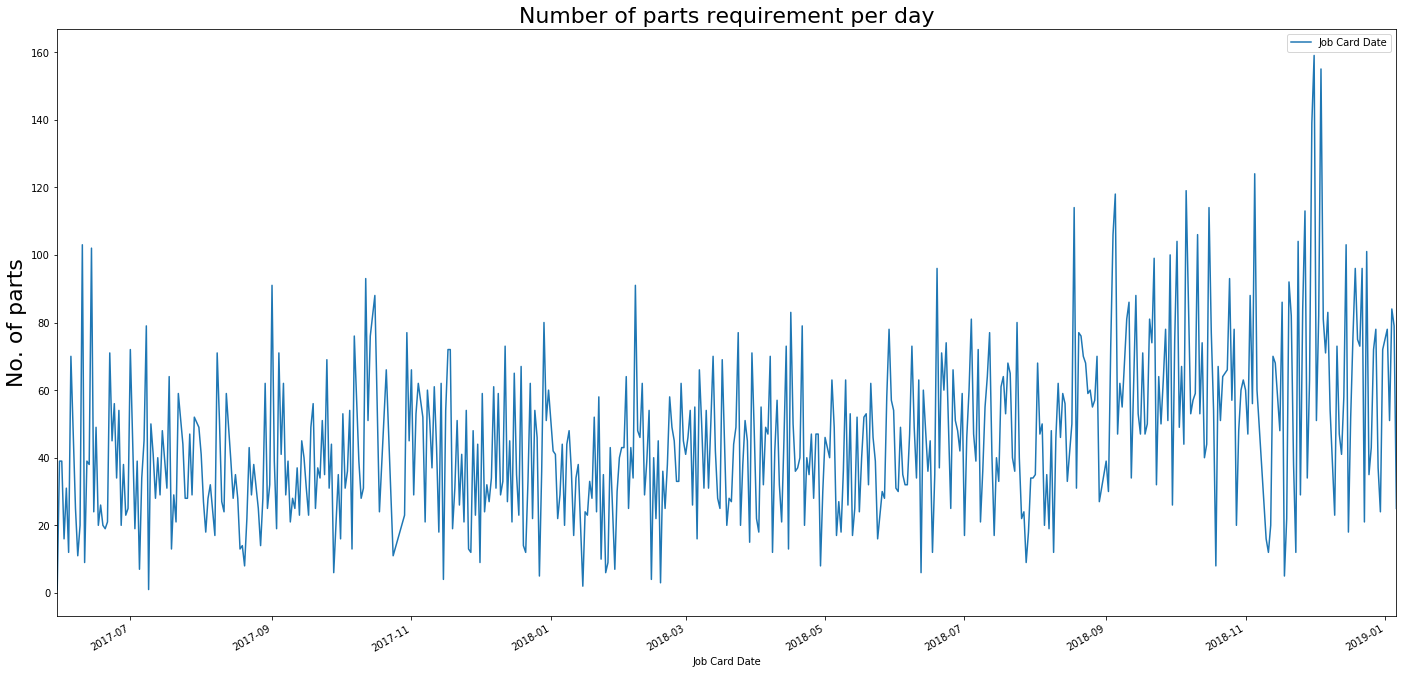

In [23]:
plt.rcParams['figure.figsize'] = (24,12)
df.groupby(['Job Card Date'])['Job Card Date'].count().to_frame().plot()
plt.title('Number of parts requirement per day', fontdict={'fontsize':22})
plt.ylabel('No. of parts', fontdict={'fontsize':22});

### Top most demanded parts

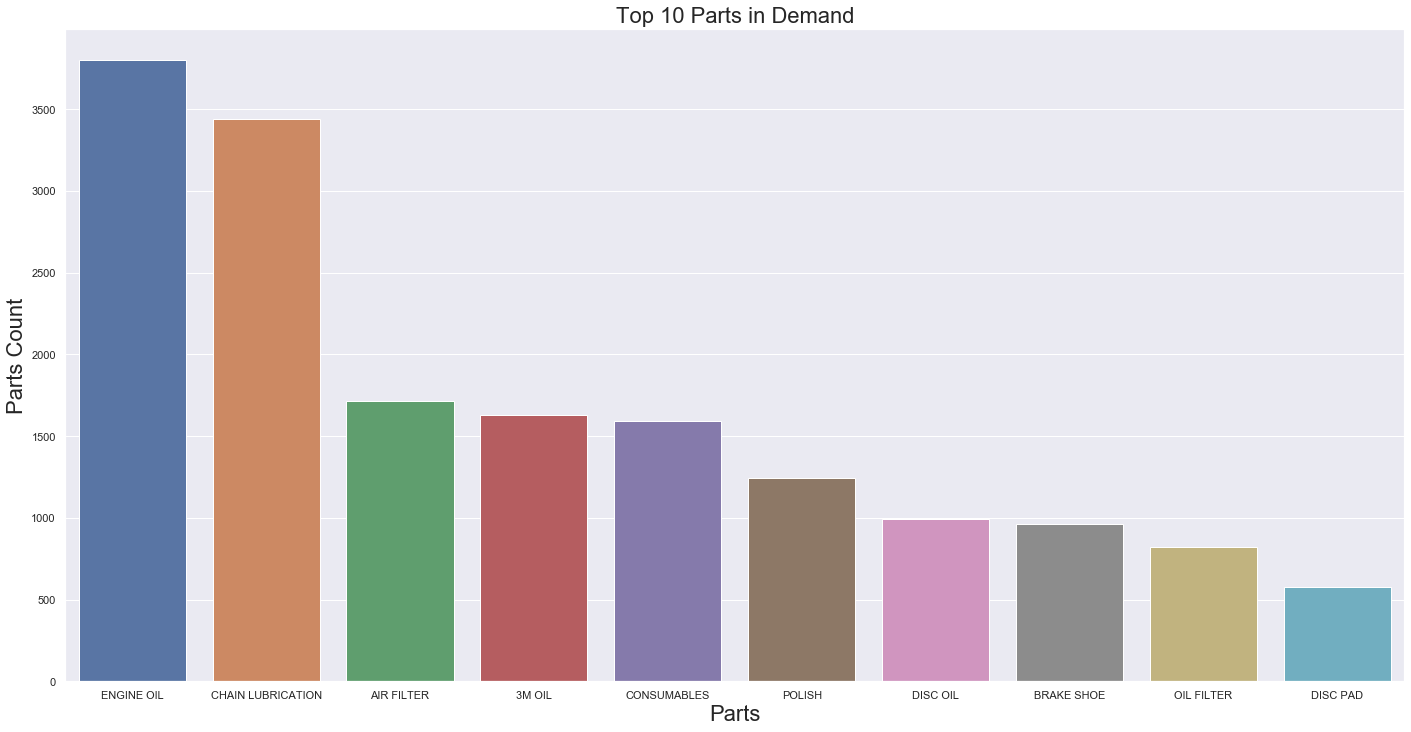

In [35]:
sns.set(style='darkgrid')
sns.countplot(df['INVOICE LINE TEXT'], order=df['INVOICE LINE TEXT'].value_counts().index[:10])
plt.title('Top 10 Parts in Demand', fontdict={'fontsize':22});
plt.ylabel('Parts Count', fontdict={'fontsize':22});
plt.xlabel('Parts', fontdict={'fontsize':22});

* All we need for further forecasting parts requirement are columns 'Job Card Date' and 'INVOICE LINE TEXT'  
* Lets rename these columns appropriately as 'Date' and 'Item'

In [36]:
ordered_inventery = df[['Job Card Date', 'INVOICE LINE TEXT']]

In [37]:
ordered_inventery.columns

Index(['Job Card Date', 'INVOICE LINE TEXT'], dtype='object')

In [38]:
ordered_inventery = ordered_inventery.rename({ 'Job Card Date':'Date', 'INVOICE LINE TEXT':'Item'}, axis='columns')

In [39]:
ordered_inventery.head(2)

,Date,Item
0,2017-05-30,ENGINE OIL
1,2017-05-31,ENGINE OIL


In [41]:
ordered_inventery.Item.value_counts().sum()

25305

#### There are more than 25k orders in 21 months of data

In [43]:
ordered_inventery.Item.value_counts()[0:20].sum()

19860

#### Top 20 items make up nearly 19.8k orders

In [45]:
( ordered_inventery.Item.value_counts()[0:20].sum() * 100 ) / ordered_inventery.Item.value_counts().sum()

78.48251333728513

#### Top 20 items make up 80% of the demand

## Below are some of the assumptions and conclusions

* From data, there are a lot of items ordered less than 5 times over a period of 21 months. For these orders, order frequency is not sufficient for good forecasting  
* Our forecasting model should atleast forecast 80% of the orders so that it is significantly useful to customer.

In [ ]:
ordered_inventery.set_index('Date', inplace=True)

In [ ]:
ordered_inventery.to_excel('P4dataCleaned2.xlsx')